# Analyzing Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Did more employees in the DETE or TAFE institute end their employment because they were dissatisfied in some way?
- How many people in each age group resgined due to some kind of dissatisfaction? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for *both* surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. We'll therefore aim to perform lots of data cleaning before getting started analyzing. Furthermore, a data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

### Summary of Results

After analyzing the data, we reached the conclusion that most of the established employees (~52%) resigned due to some dissatisfaction, whereas most of the newer employees (~71%) resigned due to other reasons. There were almost twice as many dissatisfied employees in the Department of Education, Training and Employment (DETE) compared to the Technical and Further Education (TAFE) institute. Finally, we also disovered that most of the older-aged employees (~52%) resigned due to some dissatisfaction, whereas most of the younger-aged employees (~65%) resigned due to other reasons.

It seems as though older, more established employees are getting tired of their workplace, especially in the Department of Education, Training and Employment (DETE).

## Reading in and Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Exploring dete_survey dataframe
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
# Exploring dete_survey dataframe
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
# Exploring tafe_survey dataframe
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
# Exploring tafe_survey dataframe
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

The initial columns of interest in these dataframes are the `SeparationType` from dete_survey and `Reason for ceasing employment` from tafe_survey.

In [5]:
# Checking for most frequent reasons for leaving job in DETE
dete_survey["SeparationType"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
# Checking for most frequent reasons for leaving job in TAFE institute
tafe_survey["Reason for ceasing employment"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

The first observation we can make is that in the TAFE institute, close to 50% of the departures accounted for are due to resignations whereas in the DETE the major reason for departure is age retirement.

Next, we can check the dataframes for missing values.

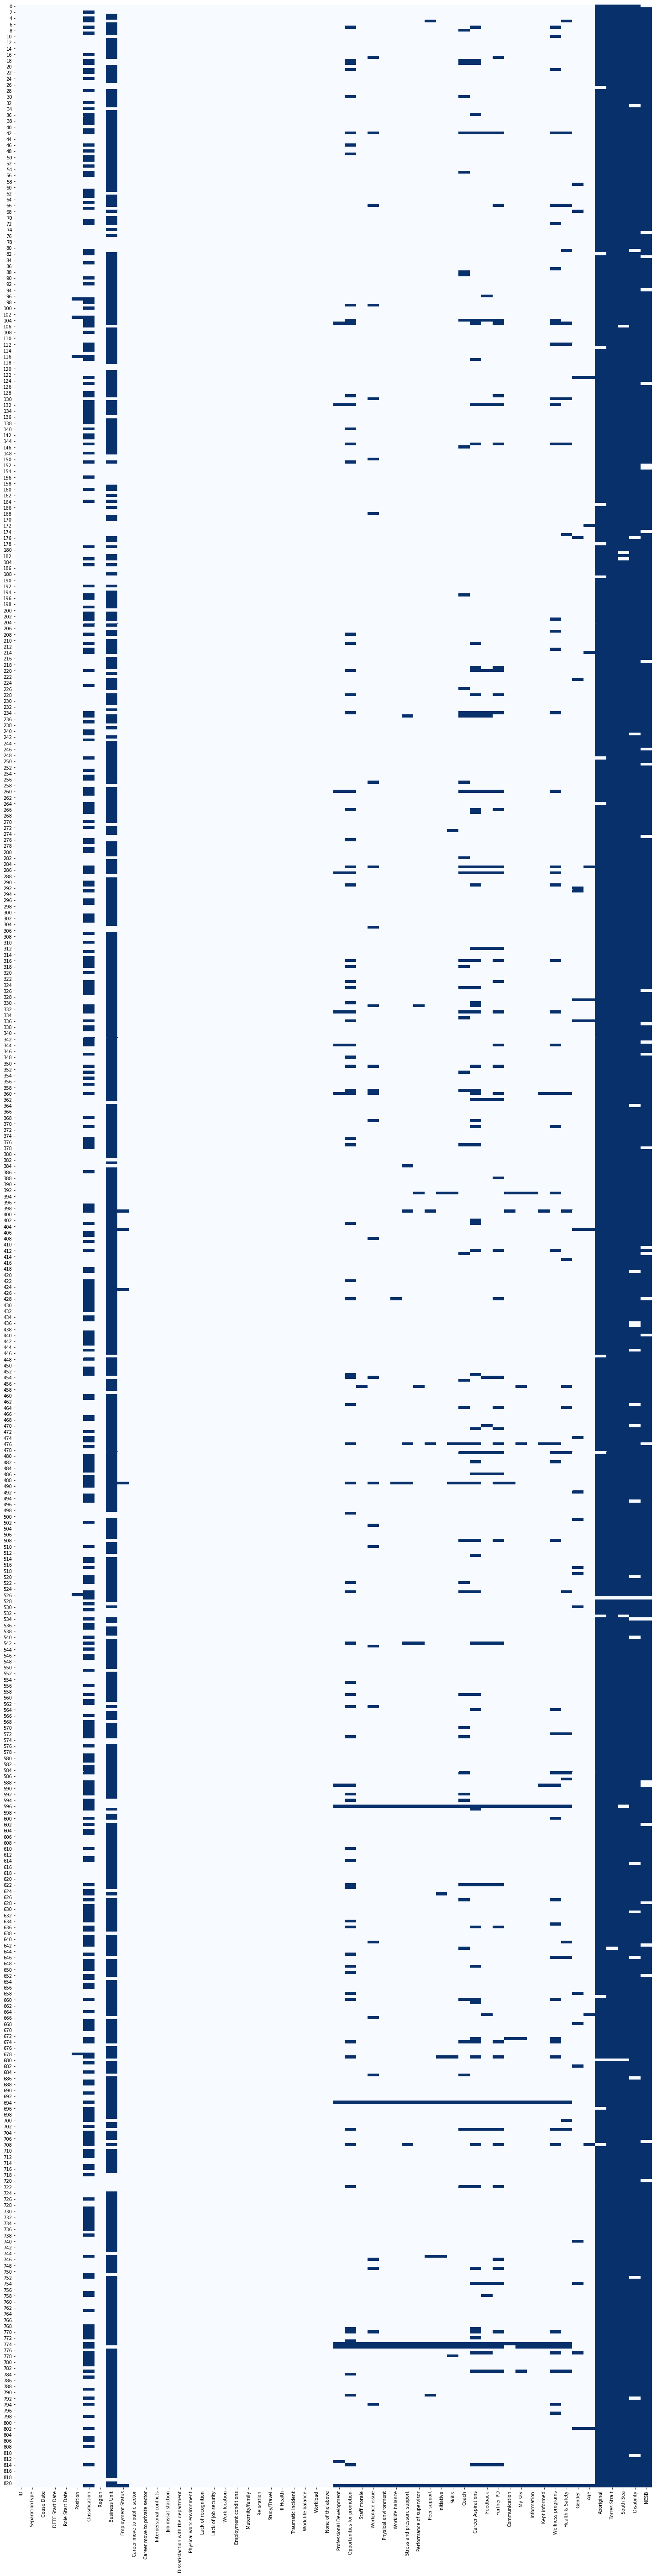

In [7]:
import seaborn as sns

# Creating long figure to handle all rows
plt.figure(figsize=(25,100))

# Creating heatmap for missing values in dete dataframe
sns.heatmap(dete_survey.isnull(), cbar=False, cmap='Blues') # Changing color to blue

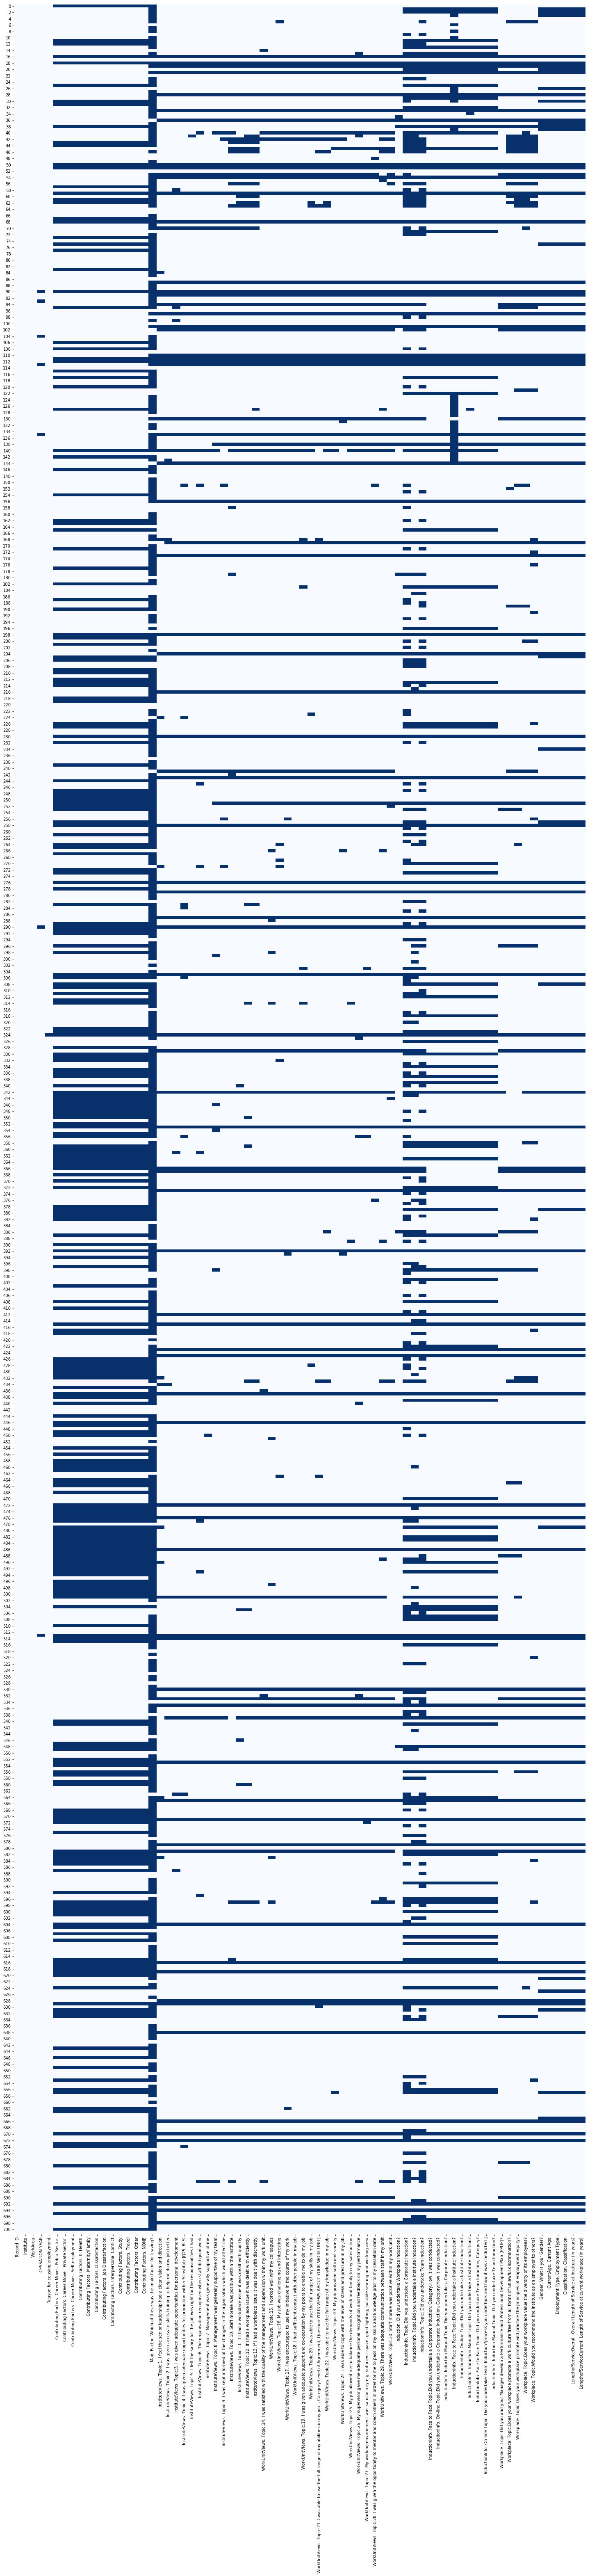

In [8]:
# Creating long figure to handle all rows
plt.figure(figsize=(25,100))

# Creating heatmap for missing values in tafe dataframe
sns.heatmap(tafe_survey.isnull(), cbar=False, cmap='Blues') # Changing color to blue

Overall, we can make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.
- There are many missing values in both dataframes.

## Modifying Missing Values and Dropping Unnecessary Columns

To start, we'll handle the first two issues. We can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [9]:
# Specifying NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Exploring dataframe
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Since our goal is to work with an employee's age, employment period and reason for ceasing employment, we can drop all irrelevant columns.

In [10]:
# Dropping useless columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Exploring updated columns
print(*dete_survey_updated.columns, sep='\n')
print('\n')
print(*tafe_survey_updated.columns, sep='\n')

ID
SeparationType
Cease Date
DETE Start Date
Role Start Date
Position
Classification
Region
Business Unit
Employment Status
Career move to public sector
Career move to private sector
Interpersonal conflicts
Job dissatisfaction
Dissatisfaction with the department
Physical work environment
Lack of recognition
Lack of job security
Work location
Employment conditions
Maternity/family
Relocation
Study/Travel
Ill Health
Traumatic incident
Work life balance
Workload
None of the above
Gender
Age
Aboriginal
Torres Strait
South Sea
Disability
NESB


Record ID
Institute
WorkArea
CESSATION YEAR
Reason for ceasing employment
Contributing Factors. Career Move - Public Sector 
Contributing Factors. Career Move - Private Sector 
Contributing Factors. Career Move - Self-employment
Contributing Factors. Ill Health
Contributing Factors. Maternity/Family
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
Contributing Factors. Interpersonal Conflict
Contributing Factors. Study


## Renaming Columns

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey | tafe_survey | Definition |
|---|---|---|
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employmeny|The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date |  | The year the participant began employment with the DETE |
| | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment in years) |
| Age| Current Age. Current Age |The age of the participant |
| Gender| Gender. What is your Gender? |The gender of the participant |

Because we eventually want to combine them, we'll have to standardize the column names.

In [11]:
# Renaming dete_survey_updated columns to all lowercase, remove all trailing whitespace & replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.rstrip().str.replace(' ', '_')

# Exploting updated columns
print(*dete_survey_updated.columns, sep='\n')

id
separationtype
cease_date
dete_start_date
role_start_date
position
classification
region
business_unit
employment_status
career_move_to_public_sector
career_move_to_private_sector
interpersonal_conflicts
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
maternity/family
relocation
study/travel
ill_health
traumatic_incident
work_life_balance
workload
none_of_the_above
gender
age
aboriginal
torres_strait
south_sea
disability
nesb


Based on the column names from dete_survey, we can update the tafe_survey columns names. We will first take care of the columns of interest listed in the table above.

In [12]:
# Creating mapping dictionary for new column names
column_dict = {'Record ID': 'id', 
               'CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype',
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age',
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# Renaming columns in tafe_survey
tafe_survey_updated = tafe_survey_updated.rename(column_dict, axis=1)

# Exploring updated column names
print(*tafe_survey_updated.columns, sep='\n')

id
Institute
WorkArea
cease_date
separationtype
Contributing Factors. Career Move - Public Sector 
Contributing Factors. Career Move - Private Sector 
Contributing Factors. Career Move - Self-employment
Contributing Factors. Ill Health
Contributing Factors. Maternity/Family
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
Contributing Factors. Interpersonal Conflict
Contributing Factors. Study
Contributing Factors. Travel
Contributing Factors. Other
Contributing Factors. NONE
gender
age
employment_status
position
institute_service
role_service


The column names in both dataframes that we are interested in are now the same. This will allow us to compare values more easily and merge both dataframes in order to perform the analyses required to answer our initial questions.

## Dropping Non-Resignation-Related Leaves

One of our end goals is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who *resigned*, so their separation type contains the string 'Resignation'.

In [13]:
# Reviewing unique reasons for leaving in both dataframes
print(dete_survey_updated["separationtype"].value_counts(), '\n')
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


The dete_survey dataframe contains three resignation types whereas the tafe_survey dataframe only contains one. We can now select these and assign them to a separate dataframe.

In [14]:
# Isolating resignations, using copy method to avoid the SettingWithCopy Warning
dete_resignations = dete_survey_updated[(dete_survey_updated["separationtype"] == 'Resignation-Other reasons') | (dete_survey_updated["separationtype"] == 'Resignation-Other employer') | (dete_survey_updated["separationtype"] == 'Resignation-Move overseas/interstate')].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == 'Resignation'].copy()

Since we will be focusing our efforts on analyzing resignations, saving them onto a separate dataframe will make this process easier.

## Verifying the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [15]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

Since we would like to extract the year, we can use vectorized string methods to do so.

In [16]:
# Extracting the year from the date using regular expression, using copy method to avoid the SettingWithCopy Warning
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([0-9]{4})").copy()

# Checking modified column
dete_resignations["cease_date"].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [17]:
# Converting type to float
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype('float')

# Checking values for start and cease dates in both dataframes, sorting index from lowest to hughest to check for outliers
print(dete_resignations["cease_date"].value_counts().sort_index(ascending=True), '\n')
print(dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True), '\n')
print(tafe_resignations["cease_date"].value_counts().sort_index(ascending=True), '\n')

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64 

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64 

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64 



We can also plot these values with a boxplot to identify any outliers.

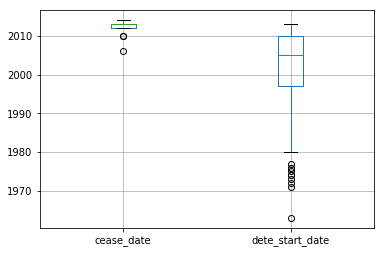

In [18]:
dete_resignations.boxplot(["cease_date", "dete_start_date"])

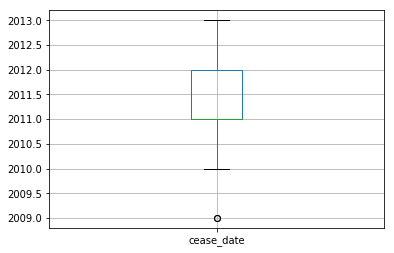

In [19]:
tafe_resignations.boxplot("cease_date")

After a thorough inspection, there does not seem to be any out of the ordinary values in the columns containing information about years.

## Calculating Years of Service

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignations` dataframe already contains a "service" column, which we renamed to "institute_service". In order to analyze both surveys together, we'll have to create a corresponding "institute_service" column in the other dataframe (`dete_resignations`).

In [20]:
# Creating new column, using copy method to avoid the SettingWithCopy Warning
dete_resignations["institute_service"] = dete_resignations["cease_date"].copy() - dete_resignations["dete_start_date"].copy()

# Exploring new column
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

We just created a new "institute_service" column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

`tafe_survey_updated`:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

`dafe_survey_updated`:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [21]:
# Exploring values in tafe_resignations dissatisfaction columns
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))

print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We can update these columns to only contain `True`, `False` or `NaN` values.

In [22]:
# Creating function to update values
def update_vals(entry):
    if pd.isnull(entry): # Checking if values is null
        return np.nan
    elif entry == "-":
        return False
    else:
        return True
    
# Applying function to tafe_resignations
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)

# Creating copy of the results to avoid the SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()

# Checking values after update
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
# Replicating procedure on dete_resignations dataframe - exploring values in dete_resignations dissatisfaction columns
print(dete_resignations["job_dissatisfaction"].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64


It seems that the dete_resignations dataframe already contains True and False values in the dissatisfaction columns. We can therefore directly create a dissatisfied column using the `any()` method.

In [24]:
# Applying function to tafe_resignations
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]].any(axis=1, skipna=False)

# Creating copy of the results to avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()

# Checking values after update
dete_resignations_up["dissatisfied"].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

In [25]:
# Calculating percentage of resignations due to dissatisfaction for each employer
print("TAFE dissatisfied resigning employees: ", round(91/(241+91+8)*100, 2), "%")
print("DETE dissatisfied resigning employees: ", round(149/(162+149)*100, 2), "%")

TAFE dissatisfied resigning employees:  26.76 %
DETE dissatisfied resigning employees:  47.91 %


We notice that there is a higher percentage of employees that resigned due to dissatisfaction in the DETE (48%) compared to the TAFE (27%). Although this is a big difference, we have to be critical of the method that we used to determine dissatisfaction as the `dete_resignations` dataframe had over 4 times as many columns asking about dissatisfaction compared to the `tafe_resignations` dataframe.

In [26]:
# Quick exploration of both dataframes
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [27]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


## Combining the Data

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

We can now combine our datasets. Our end goal is to aggregate the data according to the "institute_service" column so when we combine the data we need to think about the best way to get the data into a form that is easy to aggregate.

First we should add a column to each dataframe that will allow us to easily distinguish between the two:

In [28]:
# Creating new columns
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# Combining dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], join="inner")

# Quick exploration of combined dataframe
combined

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
12,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE
14,1.500000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5,True,DETE
16,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE
20,2.100000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,DETE
21,2.200000e+01,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,DETE


We still have some columns left in the dataframe that we don't need to complete our analysis. Using the `DataFrame.dropna()` method, we can drop any columns with less than 500 non null values.

In [29]:
# Dropping columns with less than 500 non null values
combined_updated = combined.dropna(axis=1, thresh=500)

# Quick exploration of combined dataframe
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


We can also drop the "id" column:

In [30]:
combined_updated = combined_updated.drop("id", axis=1)

combined_updated.head()

,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis. The "institute_service" column is the last column we will have to clean before performing our analysis.

## Cleaning the Service Column

This column is tricky to clean because it currently contains values in a couple different forms:

In [31]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the "institute_service" column using the definitions above.

In [32]:
# Extracting years of service from each value in the column
combined_updated["institute_service"] = combined_updated["institute_service"].astype('str').str.extract(r"(\d+)").astype('float')

# Quick check of results
combined_updated["institute_service"].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

In [33]:
# Creating function that maps each year value to one of the career stages
def career_stage(val):
    if val <= 3:
        return "New"
    elif val <= 6:
        return "Experienced"
    elif val <= 10:
        return "Established"
    elif val >= 11:
        return "Veteran"
    elif pd.isnull(val):
        return np.nan
    
# Applying function to institute_service column, creating new column for results
combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)

# Quick check of results
combined_updated["service_cat"].value_counts(dropna=False)

New            276
Veteran        136
Experienced     89
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing Analysis - Dissatisfied Employees Per Service Category

We will first fill in missing values in the "dissatisfied" column and then aggregate the data to get started, but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, not the final analysis.

The "dissatisfied" column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. 

That means that we can aggregate the "dissatisfied" column and calculate both the number and the proportion of dissatisfied people in each group.

In [34]:
# Confirming # of True & False
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will replace the `NaN` values with the value that occurs most often in this column: `False`

In [35]:
# Filling with NaN with False
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

# Checking # of True & False
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

We can now aggregate by service category and calculate both the number and the proportion of dissatisfied employees in each group.

In [36]:
# Creating pivot table, grouping by service category and calculating number of dissatisfied employees, assigning results to new dataframe
service_dissatisfaction_num = pd.pivot_table(combined_updated, values="dissatisfied", index="service_cat", aggfunc='sum')

# Quick exploration of new dataframe
service_dissatisfaction_num

,dissatisfied
service_cat,
Established,32.0
Experienced,36.0
New,80.0
Veteran,66.0


In [37]:
# Creating pivot table, grouping by service category and calculating average of dissatisfied employees, assigning results to new dataframe
service_dissatisfaction_prop = pd.pivot_table(combined_updated, values="dissatisfied", index="service_cat")

# Quick exploration of new dataframe
service_dissatisfaction_prop

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.404494
New,0.289855
Veteran,0.485294


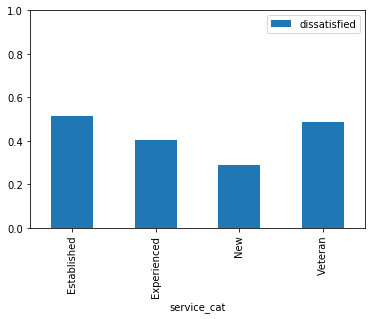

In [38]:
# Plotting results
service_dissatisfaction_prop.plot(kind='bar', ylim=(0,1))

We can recall our first question:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

From this quick analysis, it seems that most of the established employees (~52%) resigned due to some dissatisfaction, whereas most of the newer employees (~71%) resigned due to other reasons. 

## Performing Analysis - Dissatisfied Employees Per Institute

Next, instead of analyzing the survey results together, analyze each survey separately. We can attempt to answer the following question:
- Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [39]:
# Creating pivot table, grouping by institute and calculating average of dissatisfied employees for each institute, assigning results to new dataframe
department_dissatisfaction = pd.pivot_table(combined_updated, values="dissatisfied", index="institute")

# Quick exploration of new dataframe
department_dissatisfaction

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


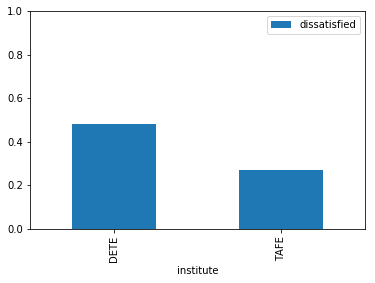

In [40]:
# Plotting results
department_dissatisfaction.plot(kind='bar', ylim=(0,1))

There are almost twice as many dissatisfied employees in the Department of Education, Training and Employment (DETE) compared to the Technical and Further Education (TAFE) institute. This is an important result that would need to be put forward when presenting results to stakeholders.

## Cleaning the Age Column

Next, we need to clean the age column in order to answer the following questions:

- How many people in each age group resgined due to some kind of dissatisfaction?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [41]:
# Checking unique values in age column
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The way the ages seem to be divided, we can resort to grouping them by decade. Although this is not ideal, it will simplify the analysis. An issue that we are facing however is the high number of missing values. We can isolate these in a separate dataframe and check if we can possibly fix that.

In [42]:
# Isolating rows with NaN values in age column
missing_ages = combined_updated[combined_updated["age"].isnull()]

# Quick exploration of new dataframe
missing_ages.head()

,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
214,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13.0,False,DETE,Veteran
285,Resignation-Move overseas/interstate,2012.0,Cleaner,Permanent Full-time,Female,NaN,0.0,False,DETE,New
405,Resignation-Other reasons,2012.0,Teacher,NaN,NaN,NaN,NaN,False,DETE,NaN
802,Resignation-Move overseas/interstate,2013.0,Teacher Aide,Permanent Part-time,NaN,NaN,NaN,False,DETE,NaN
821,Resignation-Move overseas/interstate,2013.0,Teacher Aide,NaN,NaN,NaN,NaN,False,DETE,NaN


It seems like the only revealing column to determine the age is the service category—let's explore this.

In [43]:
# Checking unique values in service category column
missing_ages["service_cat"].value_counts(dropna=False)

NaN        53
Veteran     1
New         1
Name: service_cat, dtype: int64

It seems like most of the service category values are actually missing. There might be a lot more missing entries than anticipated. We can verify this using a heatmap.

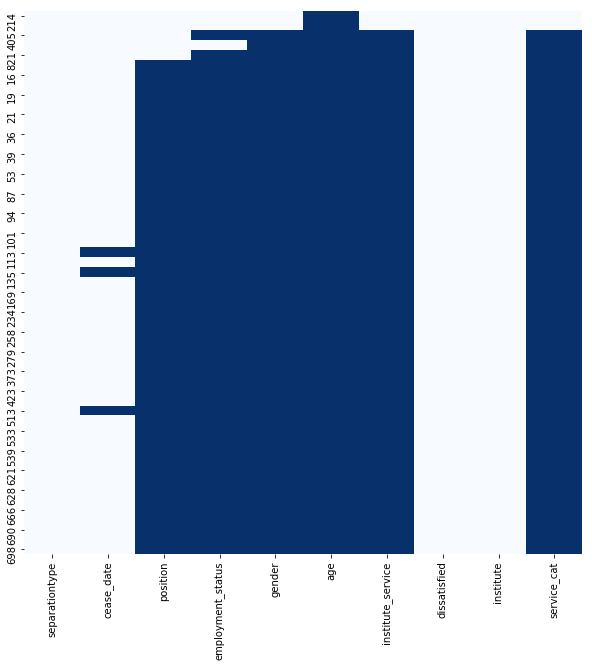

In [44]:
# Creating long figure to handle all rows
plt.figure(figsize=(10,10))

# Creating heatmap for missing values in dete dataframe
sns.heatmap(missing_ages.isnull(), cbar=False, cmap="Blues") # Changing color to blue

The rows with missing values in the age column are missing values in most of the other columns. This means that we will not be able to use these entries.

We can carry on our analysis by grouping the existing ages by decade.

In [45]:
# Extracting age from each value in the column
combined_updated["age"] = combined_updated["age"].astype('str').str.extract(r"(\d+)").astype('float')

# Quick check of results
combined_updated["age"].value_counts(dropna=False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age, dtype: int64

In [46]:
# Creating function that maps each age value to a decade
def decade(val):
    if val < 30:
        return "20s"
    elif val < 40:
        return "30s"
    elif val < 50:
        return "40s"
    elif val < 60:
        return "50s"
    elif val >= 60:
        return "60 plus"
    elif pd.isnull(val):
        return np.nan
    
# Applying function to institute_service column, creating new column for results
combined_updated["decade"] = combined_updated["age"].apply(decade)

# Quick check of results
combined_updated["decade"].value_counts(dropna=False)

40s        174
20s        139
30s        134
50s        126
NaN         55
60 plus     23
Name: decade, dtype: int64

## Performing Analysis - Dissatisfied Employees Per Age Group

Once again, we can treat the analysis the same way we did for analyzing service categories. Since the "dissatisfied" column consists of Boolean values the df.pivot_table() method will treat them as integers, meaning that we can aggregate the "dissatisfied" column and calculate both the number and the proportion of dissatisfied employees in each group.

In [47]:
# Creating pivot table, grouping by decade and calculating number of dissatisfied employees, assigning results to new dataframe
decade_dissatisfaction_num = pd.pivot_table(combined_updated, values="dissatisfied", index="decade", aggfunc='sum')

# Quick exploration of new dataframe
decade_dissatisfaction_num

,dissatisfied
decade,
20s,49.0
30s,48.0
40s,66.0
50s,51.0
60 plus,12.0


In [48]:
# Creating pivot table, grouping by decade and calculating proportion of dissatisfied employees, assigning results to new dataframe
decade_dissatisfaction_prop = combined_updated.pivot_table(index="decade", values="dissatisfied")

# Quick exploration of new dataframe
decade_dissatisfaction_prop

,dissatisfied
decade,
20s,0.352518
30s,0.358209
40s,0.379310
50s,0.404762
60 plus,0.521739


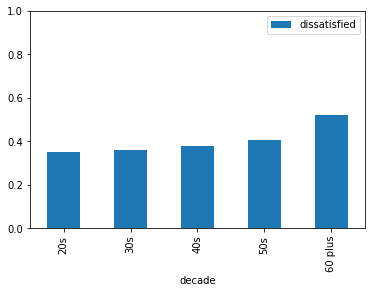

In [49]:
# Plotting results
decade_dissatisfaction_prop.plot(kind='bar', ylim=(0,1))

We can recall our questions about age groups:
- How many people in each age group resgined due to some kind of dissatisfaction?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

This is the number of resignations per age group:

Age Group | # of Dissatisfied Employees
---------|------
20s	|49.0
30s	|48.0
40s	|66.0
50s	|51.0
60 plus|12.0

From this quick analysis, we also disovered that most of the older employees (~52%) resigned due to some dissatisfaction, whereas most of the younger employees (~65%) resigned due to other reasons.

## Conclusion

The goal of this project was to determine several things:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Did more employees in the DETE or TAFE institute end their employment because they were dissatisfied in some way?
- How many people in each age group resgined due to some kind of dissatisfaction? Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

After analyzing the data, we reached the conclusion that most of the established employees (~52%) resigned due to some dissatisfaction, whereas most of the newer employees (~71%) resigned due to other reasons. There were almost twice as many dissatisfied employees in the Department of Education, Training and Employment (DETE) compared to the Technical and Further Education (TAFE) institute. Finally, we also disovered that most of the older-aged employees (~52%) resigned due to some dissatisfaction, whereas most of the younger-aged employees (~65%) resigned due to other reasons. 

These are all important results that would need to be put forward when presenting our analysis to stakeholders. It seems as though older, more established employees are getting tired of their workplace, especially in the Department of Education, Training and Employment (DETE).